In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import data_describe as mw

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime

In [3]:
# /home/jupyter/awesome-data-science-models/lending-club/EDA
!gsutil cp gs://amazing-public-data/lending_club/lending_club_data.tsv .

Copying gs://amazing-public-data/lending_club/lending_club_data.tsv...
/ [1 files][  4.2 MiB/  4.2 MiB]                                                
Operation completed over 1 objects/4.2 MiB.                                      


In [4]:
dtypes={
        "Id": "int64",
        "is_bad": "int64",
        "emp_length": "float64",
        "home_ownership": "category",
        "annual_inc": "float64",
        "verification_status": "category",
        "purpose_cat": "category",
        "addr_state": "category",
        "debt_to_income": "float64",
        "delinq_2yrs": "float64",
        "earliest_cr_line": "str",
        "inq_last_6mths": "float64",
        "mths_since_last_delinq": "float64",
        "mths_since_last_record": "float64",
        "open_acc": "float64",
        "pub_rec": "float64",
        "revol_bal": "float64",
        "revol_util": "float64",
        "total_acc": "float64",
        "mths_since_last_major_derog": "int64",
        "policy_code": "category"
    }

df = pd.read_csv("./lending_club_data.tsv",
                 sep="\t",
                 na_values={"emp_length": "na"},
                 keep_default_na=True,
                 usecols=dtypes.keys(),
                 dtype=dtypes)

In [5]:
df.shape

(10000, 21)

In [6]:
df.head()

,Id,is_bad,emp_length,home_ownership,annual_inc,verification_status,purpose_cat,addr_state,debt_to_income,delinq_2yrs,...,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,mths_since_last_major_derog,policy_code
0,1,0,10.0,MORTGAGE,50000.0,not verified,medical,TX,10.87,0.0,...,0.0,NaN,NaN,15.0,0.0,12087.0,12.1,44.0,1,PC4
1,2,0,1.0,RENT,39216.0,not verified,debt consolidation,KS,9.15,0.0,...,2.0,NaN,NaN,4.0,0.0,10114.0,64.0,5.0,2,PC1
2,3,0,4.0,RENT,65000.0,not verified,credit card,CA,11.24,0.0,...,0.0,NaN,NaN,4.0,0.0,81.0,0.6,8.0,3,PC4
3,4,0,10.0,MORTGAGE,57500.0,not verified,debt consolidation,NY,6.18,1.0,...,0.0,16.0,NaN,6.0,0.0,10030.0,37.1,23.0,2,PC2
4,5,0,10.0,MORTGAGE,50004.0,VERIFIED - income,debt consolidation,OH,19.03,0.0,...,4.0,NaN,NaN,8.0,0.0,10740.0,40.4,21.0,3,PC3


In [7]:
df.drop(['Id'], axis=1, inplace=True)

In [8]:
mw.data_summary(df)

,is_bad,emp_length,home_ownership,annual_inc,verification_status,purpose_cat,addr_state,debt_to_income,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,mths_since_last_major_derog,policy_code
Data Type,int64,float64,category,float64,category,category,category,float64,float64,object,float64,float64,float64,float64,float64,float64,float64,float64,int64,category
Mean,0.1295,4.98862,,68203,,,,13.3387,0.148174,,1.06693,35.8903,61.6524,9.33457,0.0601301,14271,48.4508,22.0113,2.0022,
Standard Deviation,0.335769,3.44762,,48590.3,,,,6.75421,0.50627,,1.47605,22.3614,46.1896,4.52659,0.251245,25437.9,28.2206,11.7094,0.810963,
Median,0,4,,58000,,,,13.41,0,,1,34,86,9,0,8645.5,48.7,20,2,
Min,0,1,,2000,,,,0,0,,0,0,0,1,0,0,0,1,1,
Max,1,33,,900000,,,,29.99,11,,25,120,119,39,3,1.20736e+06,100.6,90,3,
# Zeros,8705,0,,0,,,,58,8910,,4602,163,267,0,9422,278,254,0,0,
# Nulls,0,250,0,1,0,0,0,0,5,5,5,6316,9160,5,5,0,26,5,0,0
% Most Frequent Value,87.05,21.6,47.45,3.81,43.67,44.54,17.48,0.58,89.1,0.95,46.02,1.63,2.67,10.35,94.22,2.78,2.54,3.69,34.24,20.98


<AxesSubplot:title={'center':'Data Heatmap'}, xlabel='Record #', ylabel='Variable'>

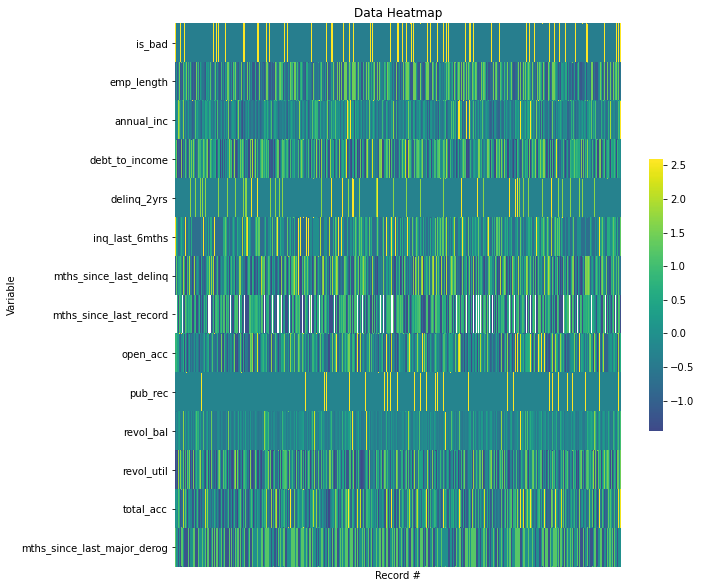

In [9]:
mw.data_heatmap(df)

In [10]:
bad_map = pd.DataFrame({'is_bad':[0,1], 'Bad Loan':['No', 'Yes']})

<AxesSubplot:xlabel='is_bad', ylabel='count'>

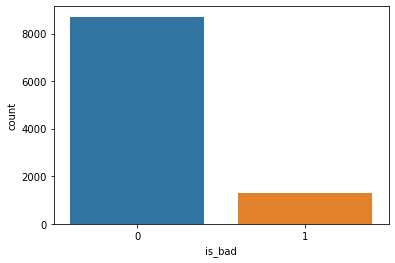

In [11]:
sns.countplot(x='is_bad', data=df.merge(bad_map))

In [12]:
mw.data_summary(df[['open_acc', 'annual_inc']])

,open_acc,annual_inc
Data Type,float64,float64
Mean,9.33457,68203
Standard Deviation,4.52659,48590.3
Median,9,58000
Min,1,2000
Max,39,900000
# Zeros,0,0
# Nulls,5,1
% Most Frequent Value,10.35,3.81


# Inspection of high income applicants

In [13]:
df_high_income = df.loc[df.annual_inc > 600000]
df_high_income.head()

,is_bad,emp_length,home_ownership,annual_inc,verification_status,purpose_cat,addr_state,debt_to_income,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,mths_since_last_major_derog,policy_code
240,0,10.0,RENT,900000.0,VERIFIED - income source,wedding,NY,1.04,3.0,11/1/99,0.0,5.0,NaN,6.0,0.0,301.0,13.1,22.0,3,PC3
1296,0,10.0,MORTGAGE,744000.0,VERIFIED - income source,debt consolidation,MI,1.44,0.0,1/1/95,5.0,NaN,NaN,14.0,0.0,17166.0,63.6,52.0,2,PC4
4577,1,4.0,MORTGAGE,700000.0,not verified,home improvement,FL,3.09,0.0,2/1/99,0.0,33.0,NaN,8.0,0.0,6960.0,44.6,14.0,2,PC4
6816,0,10.0,MORTGAGE,725000.0,VERIFIED - income,debt consolidation,TX,5.40,0.0,2/1/94,2.0,55.0,NaN,18.0,0.0,62892.0,70.3,53.0,3,PC2
7425,0,10.0,RENT,780000.0,not verified,house,MO,0.52,0.0,2/1/87,3.0,NaN,113.0,8.0,1.0,1608.0,11.1,11.0,2,PC2


# Histograms

Text(0.5, 1.0, 'Histogram of open_acc')

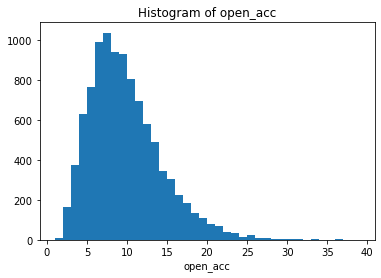

In [14]:
ax = df['open_acc'].hist(bins=38, grid=False) 
ax.set_xlabel('open_acc')
ax.set_title("Histogram of open_acc")

Text(0.5, 1.0, 'Histogram of revol_bal')

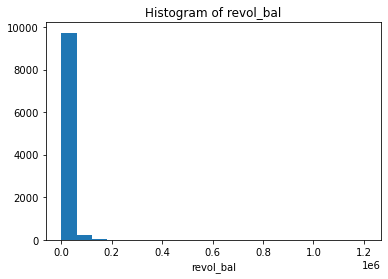

In [15]:
ax = df['revol_bal'].hist(bins=20, grid=False) 
ax.set_xlabel('revol_bal')
ax.set_title("Histogram of revol_bal")

In [16]:
mw.data_summary(df[['revol_bal', 'annual_inc']])

,revol_bal,annual_inc
Data Type,float64,float64
Mean,14271,68203
Standard Deviation,25437.9,48590.3
Median,8645.5,58000
Min,0,2000
Max,1.20736e+06,900000
# Zeros,278,0
# Nulls,0,1
% Most Frequent Value,2.78,3.81


Text(0.5, 1.0, 'Histogram of revol_util')

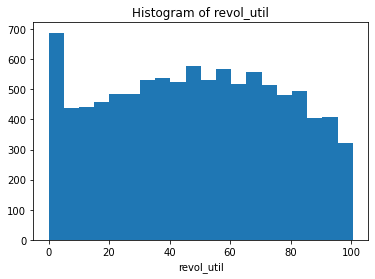

In [17]:
ax = df['revol_util'].hist(bins=20, grid=False) 
ax.set_xlabel('revol_util')
ax.set_title("Histogram of revol_util")

In [18]:
mw.data_summary(df[['revol_util', 'annual_inc']])

,revol_util,annual_inc
Data Type,float64,float64
Mean,48.4508,68203
Standard Deviation,28.2206,48590.3
Median,48.7,58000
Min,0,2000
Max,100.6,900000
# Zeros,254,0
# Nulls,26,1
% Most Frequent Value,2.54,3.81


Text(0.5, 1.0, 'Histogram of delinq_2yrs')

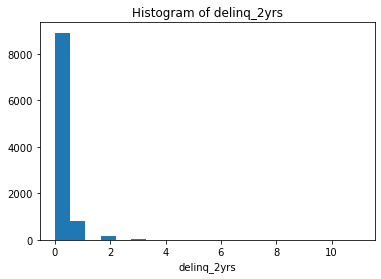

In [19]:
ax = df['delinq_2yrs'].hist(bins=20, grid=False) 
ax.set_xlabel('delinq_2yrs')
ax.set_title("Histogram of delinq_2yrs")

In [20]:
mw.data_summary(df[['delinq_2yrs', 'annual_inc']])

,delinq_2yrs,annual_inc
Data Type,float64,float64
Mean,0.148174,68203
Standard Deviation,0.50627,48590.3
Median,0,58000
Min,0,2000
Max,11,900000
# Zeros,8910,0
# Nulls,5,1
% Most Frequent Value,89.1,3.81


Text(0.5, 1.0, 'Histogram of inq_last_6mths')

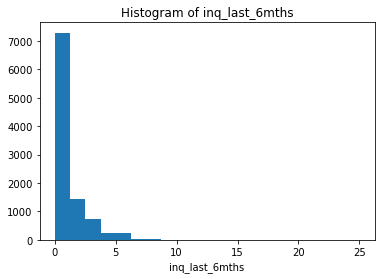

In [21]:
ax = df['inq_last_6mths'].hist(bins=20, grid=False) 
ax.set_xlabel('inq_last_6mths')
ax.set_title("Histogram of inq_last_6mths")

In [22]:
mw.data_summary(df[['inq_last_6mths', 'annual_inc']])

,inq_last_6mths,annual_inc
Data Type,float64,float64
Mean,1.06693,68203
Standard Deviation,1.47605,48590.3
Median,1,58000
Min,0,2000
Max,25,900000
# Zeros,4602,0
# Nulls,5,1
% Most Frequent Value,46.02,3.81


Text(0.5, 1.0, 'Histogram of mths_since_last_delinq')

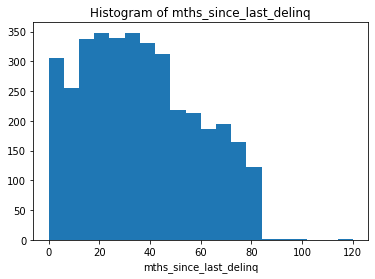

In [23]:
ax = df['mths_since_last_delinq'].hist(bins=20, grid=False) 
ax.set_xlabel('mths_since_last_delinq')
ax.set_title("Histogram of mths_since_last_delinq")

In [24]:
mw.data_summary(df[['mths_since_last_delinq', 'annual_inc']])

,mths_since_last_delinq,annual_inc
Data Type,float64,float64
Mean,35.8903,68203
Standard Deviation,22.3614,48590.3
Median,34,58000
Min,0,2000
Max,120,900000
# Zeros,163,0
# Nulls,6316,1
% Most Frequent Value,1.63,3.81


Text(0.5, 1.0, 'Histogram of mths_since_last_record')

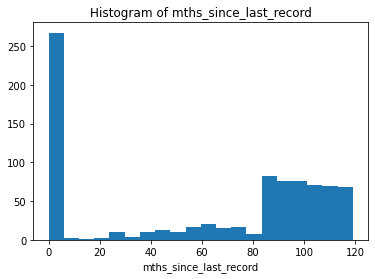

In [25]:
ax = df['mths_since_last_record'].hist(bins=20, grid=False) 
ax.set_xlabel('mths_since_last_record')
ax.set_title("Histogram of mths_since_last_record")

In [26]:
mw.data_summary(df[['mths_since_last_record', 'annual_inc']])

,mths_since_last_record,annual_inc
Data Type,float64,float64
Mean,61.6524,68203
Standard Deviation,46.1896,48590.3
Median,86,58000
Min,0,2000
Max,119,900000
# Zeros,267,0
# Nulls,9160,1
% Most Frequent Value,2.67,3.81


Text(0.5, 1.0, 'Histogram of pub_rec')

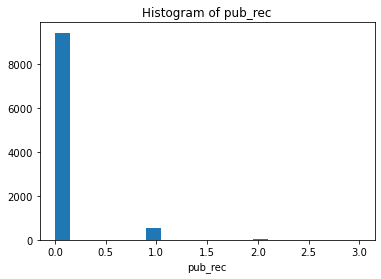

In [27]:
ax = df['pub_rec'].hist(bins=20, grid=False) 
ax.set_xlabel('pub_rec')
ax.set_title("Histogram of pub_rec")

In [28]:
mw.data_summary(df[['pub_rec', 'annual_inc']])

,pub_rec,annual_inc
Data Type,float64,float64
Mean,0.0601301,68203
Standard Deviation,0.251245,48590.3
Median,0,58000
Min,0,2000
Max,3,900000
# Zeros,9422,0
# Nulls,5,1
% Most Frequent Value,94.22,3.81


Text(0.5, 1.0, 'Histogram of total_acc')

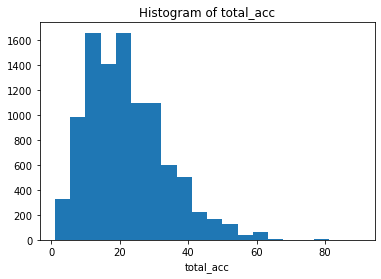

In [29]:
ax = df['total_acc'].hist(bins=20, grid=False) 
ax.set_xlabel('total_acc')
ax.set_title("Histogram of total_acc")

In [30]:
mw.data_summary(df[['total_acc', 'annual_inc']])

,total_acc,annual_inc
Data Type,float64,float64
Mean,22.0113,68203
Standard Deviation,11.7094,48590.3
Median,20,58000
Min,1,2000
Max,90,900000
# Zeros,0,0
# Nulls,5,1
% Most Frequent Value,3.69,3.81


Text(0.5, 1.0, 'Histogram of mths_since_last_major_derog')

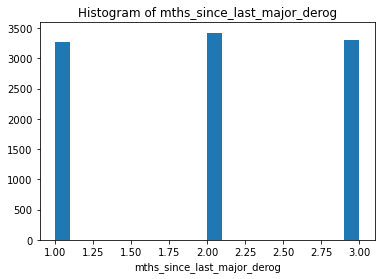

In [31]:
ax = df['mths_since_last_major_derog'].hist(bins=20, grid=False) 
ax.set_xlabel('mths_since_last_major_derog')
ax.set_title("Histogram of mths_since_last_major_derog")

Take a look at how many months since the last major derogatory note was made on this loan.

In [32]:
mw.data_summary(df[['mths_since_last_major_derog', 'annual_inc']])

,mths_since_last_major_derog,annual_inc
Data Type,int64,float64
Mean,2.0022,68203
Standard Deviation,0.810963,48590.3
Median,2,58000
Min,1,2000
Max,3,900000
# Zeros,0,0
# Nulls,0,1
% Most Frequent Value,34.24,3.81


# Correlation

<AxesSubplot:title={'center':'Correlation Matrix'}>

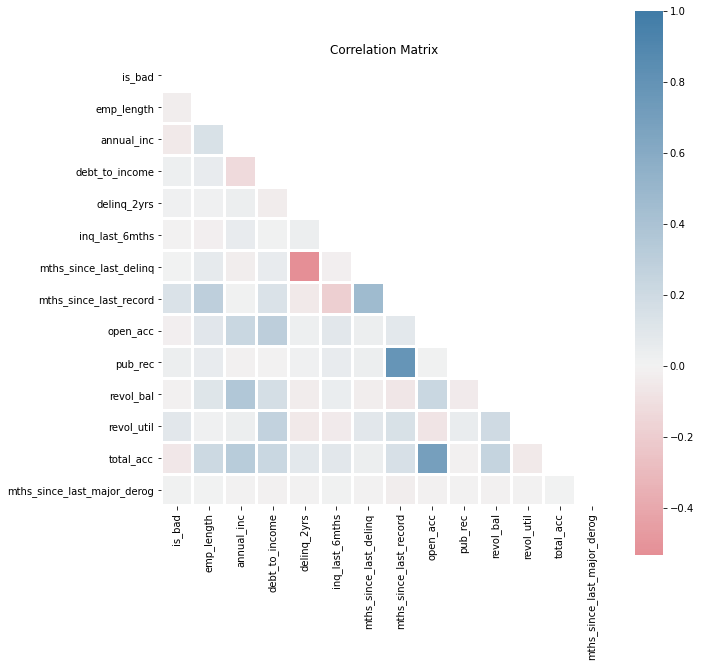

In [33]:
mw.correlation_matrix(df, cluster=False)

<AxesSubplot:title={'center':'Correlation Matrix'}>

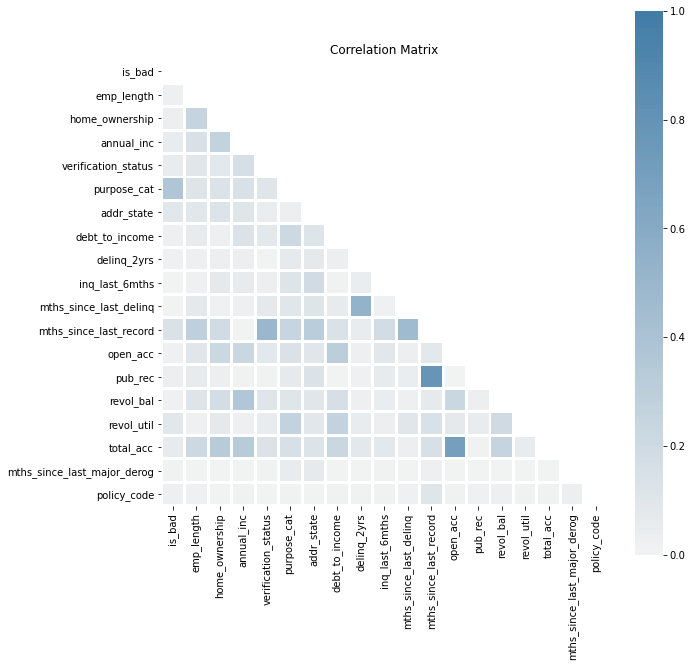

In [34]:
mw.correlation_matrix(df.drop(['earliest_cr_line'],axis=1), categorical=True, cluster=False)

In [35]:
def expand_year(x):
    """Converts YY -> YYYY

    Assumes there are no records in the current year, which will be returned as-is
    """
    this_year = datetime.datetime.now().strftime("%y")
    if int(x[::-1][:2][::-1]) < int(this_year):
        return x[0:len(x) - 2] + "20" + x[len(x) - 2:]
    elif int(x[::-1][:2][::-1]) > int(this_year):
        return x[0:len(x) - 2] + "19" + x[len(x) - 2:]
    else:
        return x

In [36]:
earliest_cr = df.earliest_cr_line.dropna()
earliest_cr = earliest_cr.astype(str)
earliest_cr = pd.to_datetime(earliest_cr.apply(lambda x: expand_year(x)))
earliest_cr_line_yr = earliest_cr.dt.year
earliest_cr_line_yr = earliest_cr_line_yr.astype(int)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 [Text(0, 0, '1950'),
  Text(1, 0, '1956'),
  Text(2, 0, '1959'),
  Text(3, 0, '1962'),
  Text(4, 0, '1963'),
  Text(5, 0, '1964'),
  Text(6, 0, '1965'),
  Text(7, 0, '1966'),
  Text(8, 0, '1967'),
  Text(9, 0, '1968'),
  Text(10, 0, '1969'),
  Text(11, 0, '1970'),
  Text(12, 0, '1971'),
  Text(13, 0, '1972'),
  Text(14, 0, '1973'),
  Text(15, 0, '1974'),
  Text(16, 0, '1975'),
  Text(17, 0, '1976'),
  Text(18, 0, '1977'),
  Text(19, 0, '1978'),
  Text(20, 0, '1979'),
  Text(21, 0, '1980'),
  Text(22, 0, '1981'),
  Text(23, 0, '1982'),
  Text(24, 0, '1983'),
  Text(25, 0, '1984'),
  Text(26, 0, '1985'),
  Text(27, 0, '1986'),
  Text(28, 0, '1987'),
  Text(29, 0, '1988'),
  Text(30, 0, '1989'),
  Text(31, 0, '1990'),
  Text(32, 0, '1991'),
  Text(33, 0, '1992'),
  

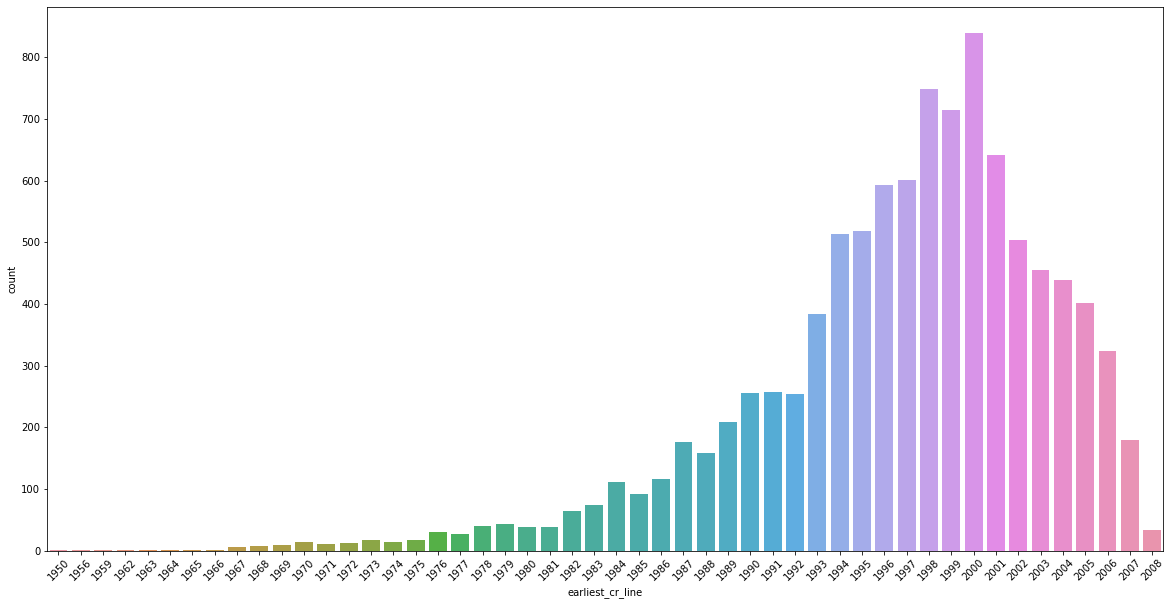

In [37]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='earliest_cr_line', data=pd.DataFrame(earliest_cr_line_yr))
plt.xticks(rotation=45)

# Feature Importance

Text(0.5, 1.0, 'Feature Importance')

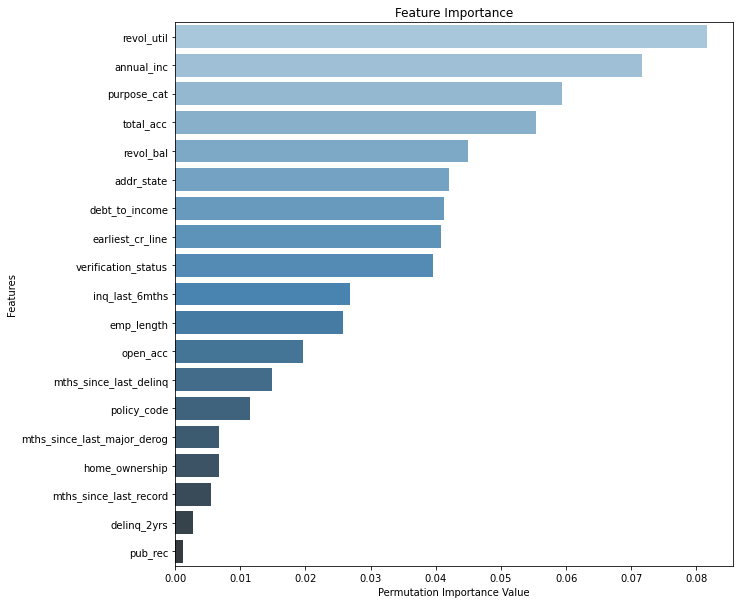

In [38]:
mw.importance(df, "is_bad", truncate=False)

# Scatter plots

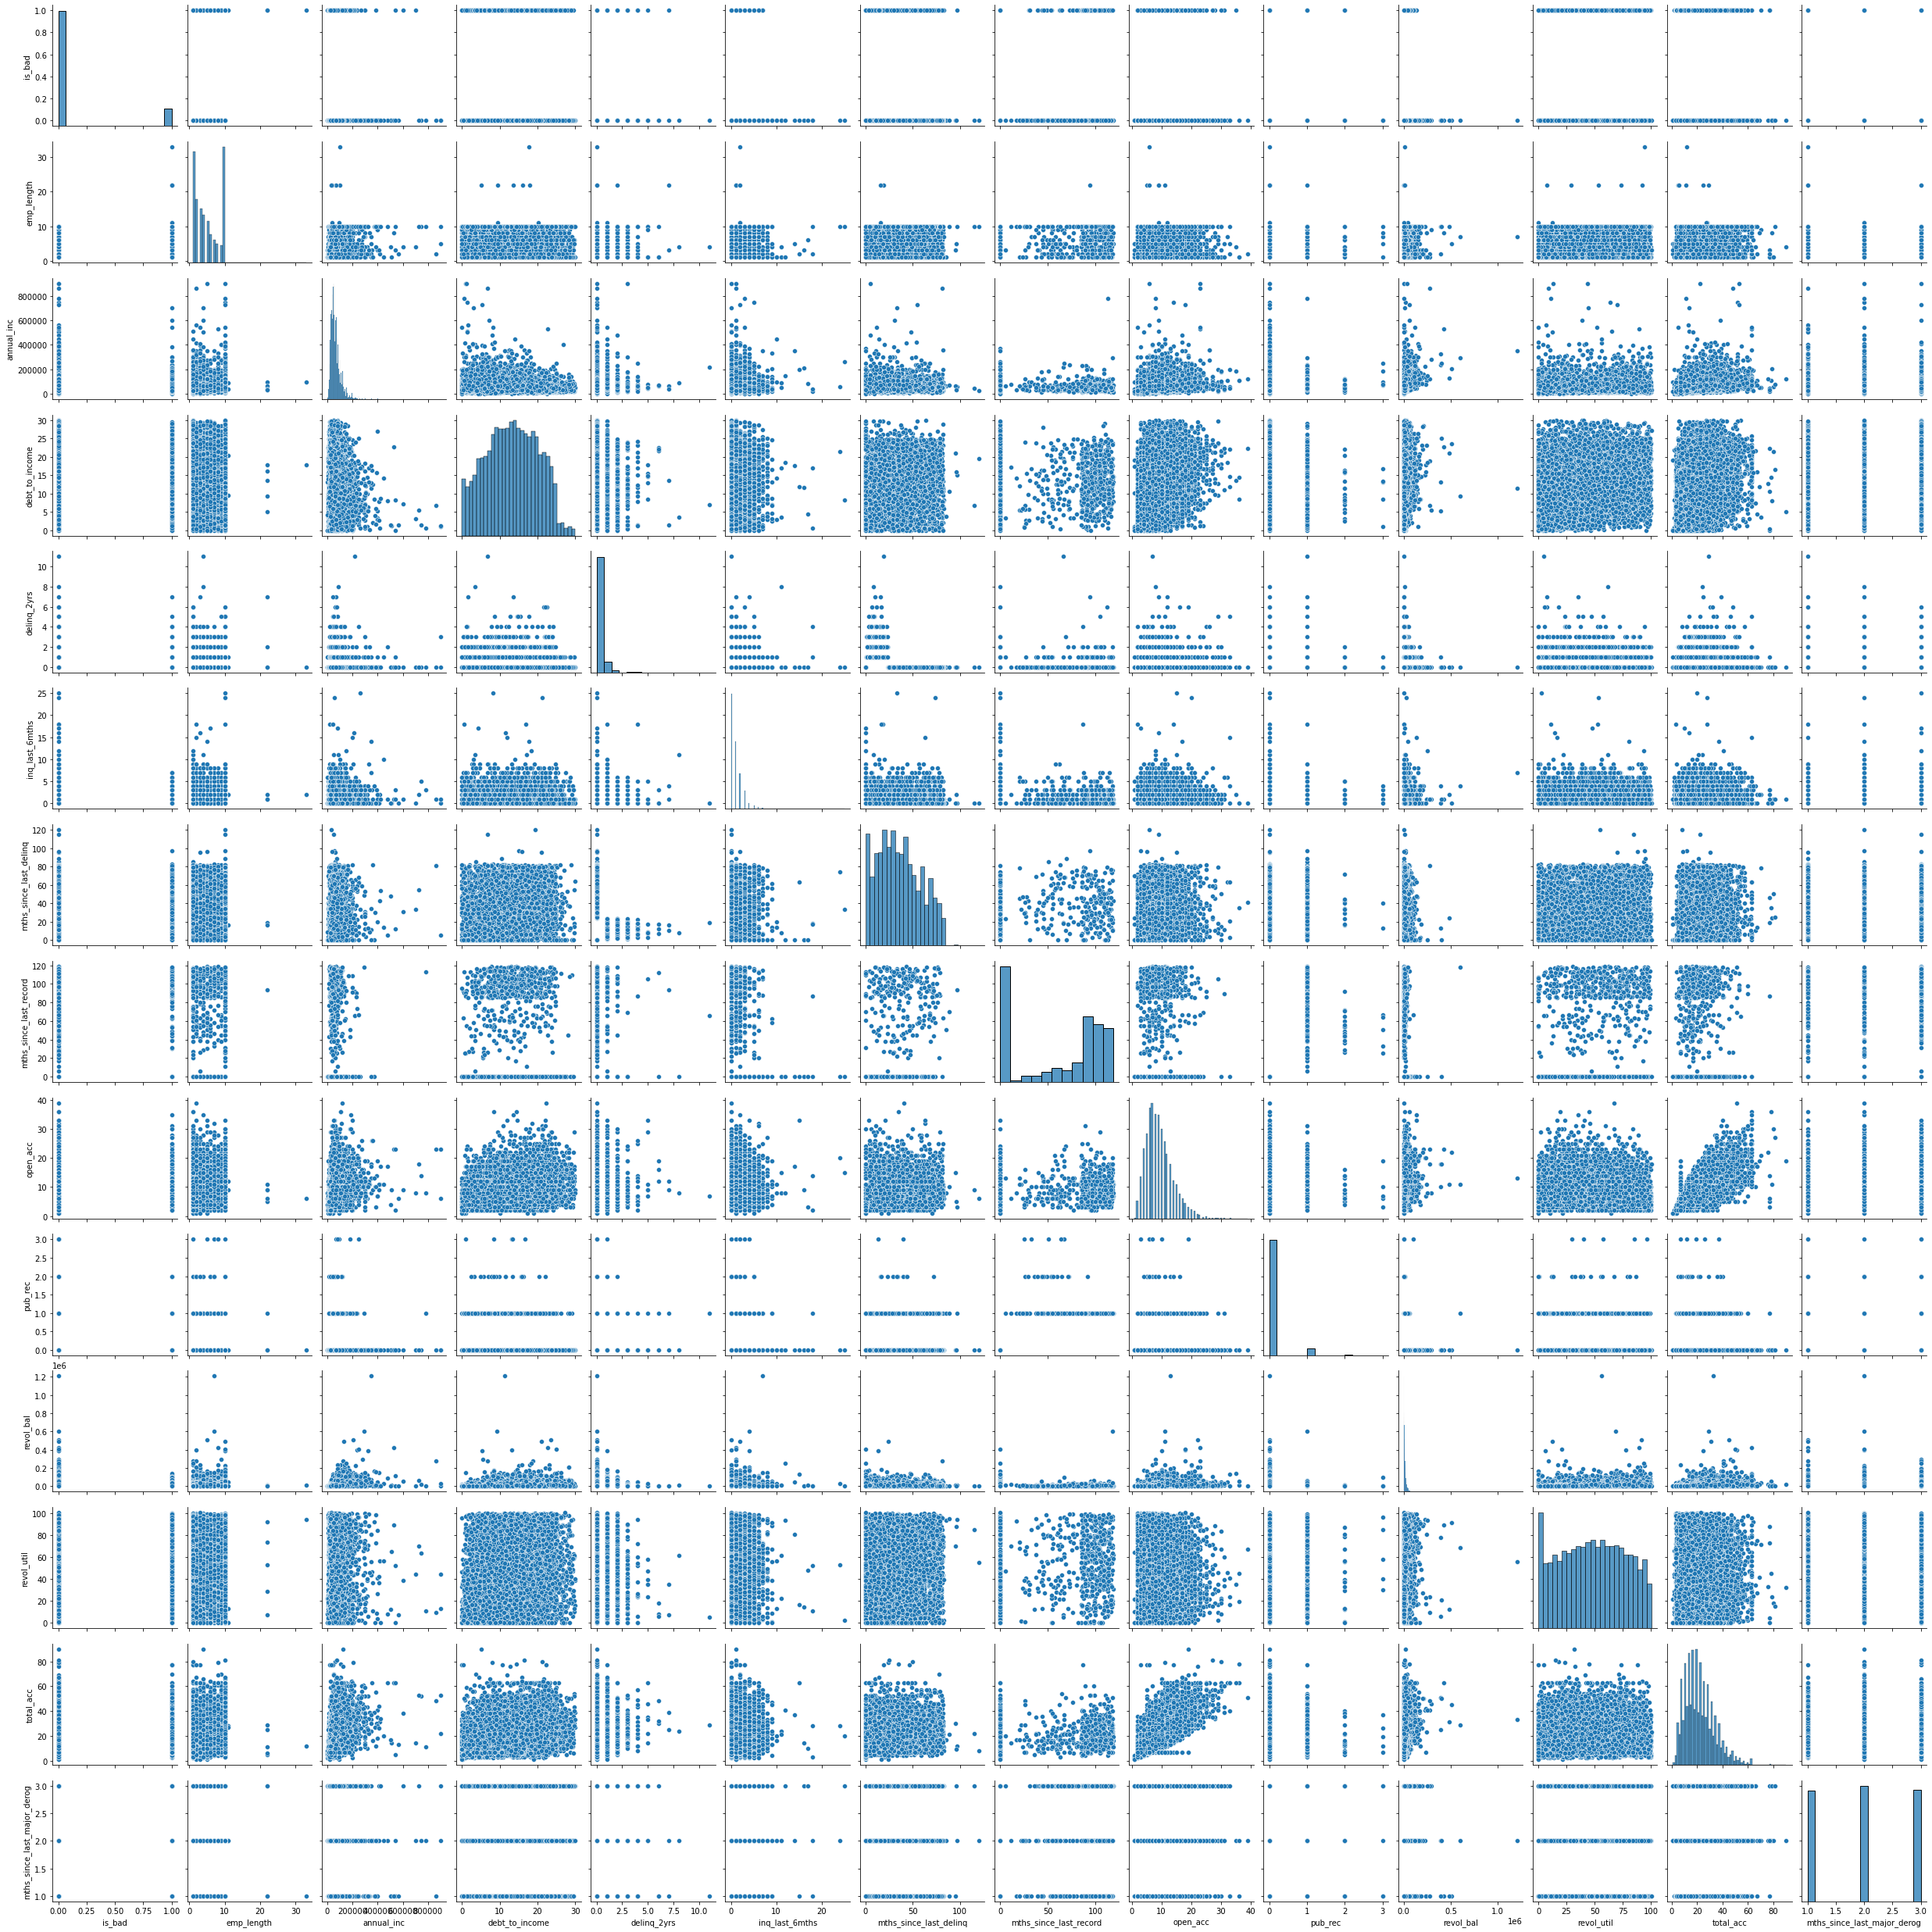

In [39]:
mw.scatter_plots(df, plot_mode='matrix')

In [40]:
clusters = mw.cluster(df.dropna())

<AxesSubplot:title={'center':'kmeans Cluster'}, xlabel='Component 1 (20.0% variance explained)', ylabel='Component 2 (16.0% variance explained)'>

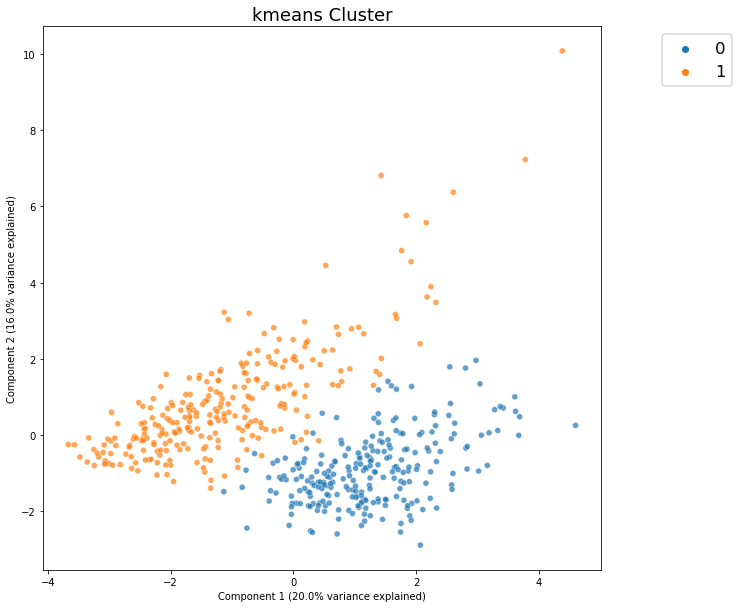

In [41]:
clusters

In [42]:
clusters.clusters

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,

In [43]:
s=pd.Series(clusters.clusters, name='cluster')
clusters_df = df.dropna().join(s)

# Explore clustering

In [44]:
mw.data_summary(clusters_df.loc[clusters_df.cluster == 0])

,is_bad,emp_length,home_ownership,annual_inc,verification_status,purpose_cat,addr_state,debt_to_income,delinq_2yrs,earliest_cr_line,...,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,mths_since_last_major_derog,policy_code,cluster
Data Type,int64,float64,category,float64,category,category,category,float64,float64,object,...,float64,float64,float64,float64,float64,float64,float64,int64,category,float64
Mean,0.1,5.1,,59010,,,,12.473,0.2,,...,45.7,71.5,9.1,0.8,5149.2,41.17,22.5,2.1,,0
Standard Deviation,0.316228,3.72529,,19679.5,,,,7.04576,0.421637,,...,22.8719,45.6344,4.33205,0.421637,4142.75,26.3602,10.7626,0.994429,,0
Median,0,5,,57900,,,,12.835,0,,...,49.5,93,8,1,5445,37.9,19.5,2.5,,0
Min,0,1,,25000,,,,2.79,0,,...,14,0,4,0,0,0,7,1,,0
Max,1,10,,97000,,,,24.05,1,,...,73,116,18,1,15260,83.9,40,3,,0
# Zeros,9,0,,0,,,,0,8,,...,0,2,0,2,1,1,0,0,,10
# Nulls,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
% Most Frequent Value,90,30,60,10,60,50,20,10,80,20,...,10,20,20,80,10,10,10,50,40,100


In [45]:
mw.data_summary(clusters_df.loc[clusters_df.cluster == 1])

,is_bad,emp_length,home_ownership,annual_inc,verification_status,purpose_cat,addr_state,debt_to_income,delinq_2yrs,earliest_cr_line,...,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,mths_since_last_major_derog,policy_code,cluster
Data Type,int64,float64,category,float64,category,category,category,float64,float64,object,...,float64,float64,float64,float64,float64,float64,float64,int64,category,float64
Mean,0.0666667,3.93333,,60169.4,,,,14.514,0.0666667,,...,33.9333,37,8.13333,0.466667,5655.27,55.6867,17.4667,2.2,,1
Standard Deviation,0.258199,3.88158,,48542,,,,6.29285,0.258199,,...,29.5743,43.5267,3.48193,0.516398,7286.62,29.0472,10.2878,0.560612,,0
Median,0,2,,45000,,,,12.82,0,,...,36,0,9,0,1509,63,17,2,,1
Min,0,1,,17573,,,,6.36,0,,...,0,0,2,0,122,3.7,3,1,,1
Max,1,10,,214000,,,,26.86,1,,...,82,102,13,1,24280,93.4,38,3,,1
# Zeros,14,0,,0,,,,0,14,,...,5,8,0,8,0,0,0,0,,0
# Nulls,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
% Most Frequent Value,93.33,40,66.67,13.33,80,53.33,20,6.67,93.33,13.33,...,33.33,53.33,20,53.33,6.67,6.67,13.33,66.67,40,100
